**1 To understand normal distribution and its application, Let us use daily returns of stocks traded in BSE (Bombay Stock Exchange). Imagine a scenario where an investor wants to understand the risks and returns associated with various stocks before investing in them. For this analysis, we will evaluate two stocks: BEML and GLAXO. The daily trading data (open and close price) for each stock is taken for the period starting from 2010 to 2016 from BSE site (www.bseindia.com)**


Import Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

Load the Data Sets

In [20]:
beml=pd.read_csv('/content/drive/MyDrive/data science classes/Day 7 -Normal Distribution Material-Random Variable and Probability/BEML.csv',parse_dates=['Date'],index_col='Date')

In [21]:
beml.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [22]:
glaxo=pd.read_csv('/content/drive/MyDrive/data science classes/Day 7 -Normal Distribution Material-Random Variable and Probability/GLAXO.csv',parse_dates=['Date'],index_col='Date')

In [23]:
glaxo.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [24]:
beml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1739 entries, 2010-01-04 to 2016-12-30
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1739 non-null   float64
 1   High                  1739 non-null   float64
 2   Low                   1739 non-null   float64
 3   Last                  1739 non-null   float64
 4   Close                 1739 non-null   float64
 5   Total Trade Quantity  1739 non-null   float64
 6   Turnover (Lacs)       1739 non-null   float64
dtypes: float64(7)
memory usage: 108.7 KB


In [25]:
glaxo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1739 entries, 2010-01-04 to 2016-12-30
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1739 non-null   float64
 1   High                  1739 non-null   float64
 2   Low                   1739 non-null   float64
 3   Last                  1739 non-null   float64
 4   Close                 1739 non-null   float64
 5   Total Trade Quantity  1739 non-null   float64
 6   Turnover (Lacs)       1739 non-null   float64
dtypes: float64(7)
memory usage: 108.7 KB


**Calculate The Daily Gain**

In [26]:
beml['gain']=beml['Close'].pct_change()
beml

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),gain
Date,,,,,,,,
2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18,NaN
2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47,-0.000881
2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84,0.004407
2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98,0.003993
2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42,-0.000087
...,...,...,...,...,...,...,...,...
2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63,-0.021924
2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14,0.026782
2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49,-0.001332


In [27]:
glaxo['gain']=glaxo['Close'].pct_change()
glaxo

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),gain
Date,,,,,,,,
2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74,NaN
2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58,-0.005444
2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09,0.013422
2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00,0.006225
2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11,-0.005398
...,...,...,...,...,...,...,...,...
2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15,-0.001283
2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10,-0.007986
2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44,0.000148


**Droping na Values from both data sets ***

In [28]:
beml.dropna(inplace=True)

In [29]:
glaxo.dropna(inplace=True)

In [30]:
beml.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
gain                    0
dtype: int64

In [31]:
glaxo.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
gain                    0
dtype: int64

**Visualize the Daily Gains**

Text(0.5, 1.0, 'daily Gain/Loss-BEML')

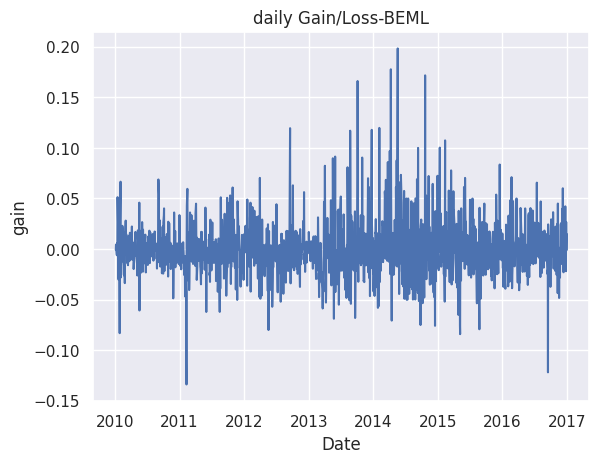

In [32]:
from seaborn.widgets import plt

# visualize the gains on a daily basis - BEML
sns.lineplot(data=beml,x=beml.index,y='gain')
plt.title('daily Gain/Loss-BEML')

Text(0.5, 1.0, 'daily Gain/Loss-GLAXO')

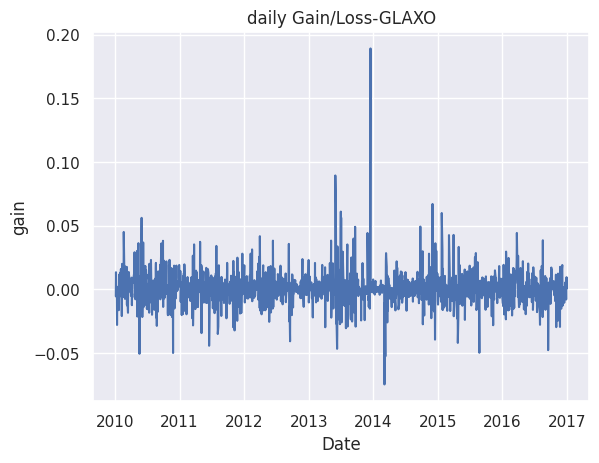

In [33]:
# visualize the gains on a daily basis - GLAXO
sns.lineplot(data=glaxo,x=glaxo.index,y='gain')
plt.title('daily Gain/Loss-GLAXO')

**Visualize the Daily Closing Price Trends**

Text(0.5, 1.0, 'Daily Closing Price Trends - BEML')

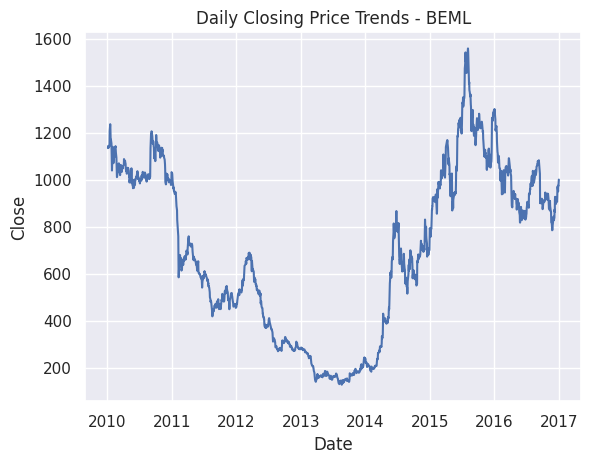

In [34]:
# Visualize the Daily Closing Price -BEML
sns.lineplot(data=beml,x=beml.index,y='Close')
plt.title('Daily Closing Price Trends - BEML')

Text(0.5, 1.0, 'Daily Closing Price Trends - GLAXO')

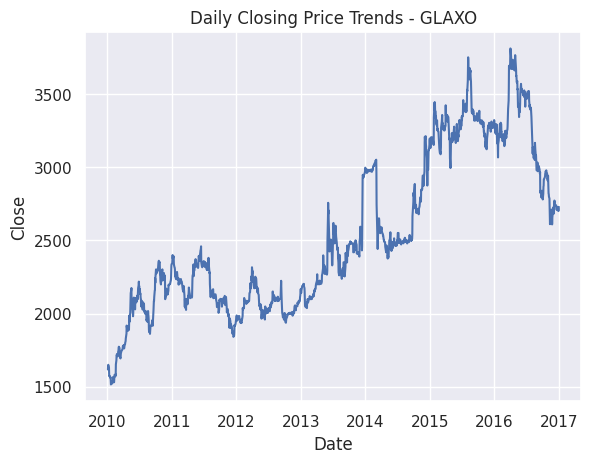

In [35]:
# Visualize the Daily Closing Price -GLAXO
sns.lineplot(data=glaxo,x=glaxo.index,y='Close')
plt.title('Daily Closing Price Trends - GLAXO')

**Visualization of Distribution of Daily Gain Values**

Text(0.5, 1.0, 'distribution of daily Gain/Loss')

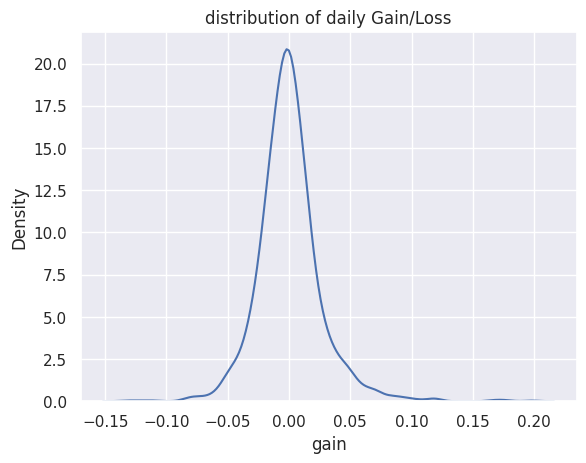

In [36]:
# Visualize the Distribution of Daily Gain Values of BEML
sns.kdeplot(data=beml,x='gain')
plt.title('distribution of daily Gain/Loss')

Text(0.5, 1.0, 'distribution of daily Gain/Loss')

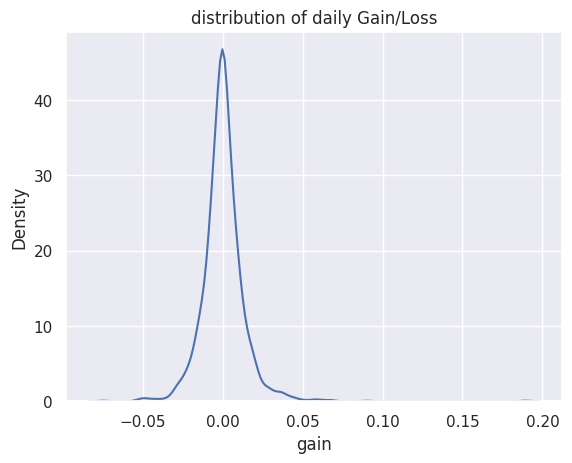

In [37]:
# Visualize the Distribution of Daily Gain Values of GLAXO
sns.kdeplot(data=glaxo,x='gain')
plt.title('distribution of daily Gain/Loss')

**Expected Gain (Average or Mean Value of Daily Gain)**

In [38]:
beml_mean=beml['gain'].mean()
beml_mean

0.0002707480790572326

In [39]:
glaxo_mean=glaxo['gain'].mean()
glaxo_mean

0.0003860410825922916

**Volatility in Daily Gain *Standard* Deviation or Variance**

In [40]:
beml_sd=beml['gain'].std()
beml_sd

0.026430831468474872

In [41]:
glaxo_sd=glaxo['gain'].std()
glaxo_sd

0.013360538552253337

**Probability of making a loss of 2% or more in Glaxo**

In [42]:
# import scipy.stats
from scipy.stats import norm

In [43]:
#Glaxo
norm.cdf(-0.02,loc=glaxo_mean,scale=glaxo_sd)

0.06352488667177401

**Probability of making a gain of 2% or more in Glaxo**

In [44]:
1-norm.cdf(0.02,loc=glaxo_mean,scale=glaxo_sd)

0.07104511457618568

**Probability of making a loss of 1% or more in BEML**

In [45]:
norm.cdf(-0.01,loc=beml_mean,scale=beml_sd)

0.34878985475250623

**Probability of making a loss of 3% or more in BEML**

In [46]:
norm.cdf(-0.03,loc=beml_mean,scale=beml_sd)

0.1260462382691962

**Confidence Interval**

In [49]:
# Confidence interval for daily gain/loss of BEML
norm.interval(confidence=0.95,loc=beml_mean,scale=beml_sd/np.sqrt(len(beml)))

(-0.0009718595923675368, 0.0015133557504820021)